<a href="https://colab.research.google.com/github/DonRoboto/KalmanFilter_v1/blob/main/SimulatedKalmanFilter_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random


In [543]:
#kalman filter 1d
class Kalman_1D():

  def __init__(self, measurement):
    self.measurement = measurement
  
      # the motion update/predict function
  def fitness(self):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    # Calculate the new parameters
    x = self.measurement
    return x**2.0
    #return 

  def measure(self, t, x_true):
    z = self.measurement + np.sin(t) * 2 * np.pi + (np.abs(self.measurement - x_true))
    return z

  def estimate(self, z, K):    
    x_est = self.measurement + K * (z -  self.measurement )
    return x_est

In [561]:
class Poblacion():
  p = []

  def __init__(self, n, x_min, x_max):

    for i in range(n):
      x_1 = random.uniform(x_min, x_max)
      ind = Kalman_1D(x_1)
      self.p.append(ind)
    

In [562]:
v_min = -100
v_max = 100
n_pob = 10
pob = Poblacion(n_pob, v_min, v_max)

l_best = 1000000
l_true = 1000000

x_best = 1000000
x_true = 1000000

for i in range(n_pob):
  print(pob.p[i].measurement, pob.p[i].fitness())
  
  if pob.p[i].fitness() < x_best:
    x_best = pob.p[i].fitness()
    l_best = pob.p[i].measurement

  if  x_best<x_true:
    x_true = x_best
    l_true = l_best


print("\n")
print("x_best: {}".format(x_best))
print("x_true: {}".format(x_true))

-45.811408576933374 2098.6851558027247
-26.20689885729975 686.8015477167388
36.42695538604613 1326.9230786969952
55.43002133546278 3072.4872652498593
-51.00057520916164 2601.058671665353
10.425831564960887 108.69796382093479
-21.284887657177038 453.0464425786474
45.079031305756274 2032.1190634653542
-39.68486932646347 1574.8888534584812
76.10519747012648 5792.001081966947


x_best: 108.69796382093479
x_true: 108.69796382093479


In [563]:
P = 1000
Q = 0.5



for t in range(1, 100, 1):
  err = []
  for j in range(n_pob):
    K = P/(P + Q)

    z_m = pob.p[j].measure(t, x_true)
    x_e = pob.p[j].estimate(z_m, K)

    pob.p[j].measurement = x_e

    P = (1 - K) * P

    err.append(np.abs(x_best - pob.p[j].fitness()))


    
    #fitness evaluation
    if pob.p[j].fitness() < x_best:
      x_best = pob.p[j].fitness()
      l_best = pob.p[j].measurement

  if  x_best<x_true:
    x_true = x_best
    l_true = l_best

  #

  cov = np.cov(err)
  #print(cov)
  P = cov       
#resultado final

for k in range(n_pob):
  print(pob.p[k].measurement, pob.p[k].fitness())


print("\n")
print("l_true: {}".format(l_true))
print("x_true: {}".format(x_true))


3.616420914654165e+31 1.3078500231948067e+63
1246.447473214805 1553631.3034835723
651.5736480630289 424548.2188501639
428.838331688831 183902.31472565982
-1.3825313501583225 1.9113929341705942
96.06877157241472 9229.208871432798
0.6851509734993659 0.4694318564871288
138.7983205139678 19264.973777498137
-7.789303837154247 60.67325426750587
172.1583369217217 29638.49297165305


l_true: -0.12962100851573044
x_true: 0.016801605848635062


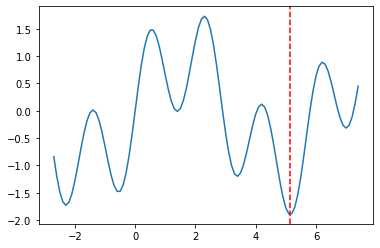

optimo en (5.145735, -1.899599349151611)


In [157]:

# multimodal function
from numpy import sin
from numpy import arange
from matplotlib import pyplot
 
# objective function
def objective(x):
	return sin(x) + sin((10.0 / 3.0) * x)
 
# define range for input
r_min, r_max = -2.7, 7.5
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 5.145735
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
# show the plot
pyplot.show()


print("optimo en ({}, {})".format(x_optima, objective(x_optima)))